In [45]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree
from sklearn.metrics import f1_score

In [6]:
train = pd.read_csv('dataset_37_diabetes.csv')

In [7]:
# Information about the columns and diabetes in general to understand about diabetes and the tests done to check for type1 and type2 diabetes
# Type 1 diabetes is often diagnosed more rapidly because it usually develops rapidly and involves high blood sugar levels and symptoms
# Type 2 diabetes develops often in over the course of years. Most common diabetes and usually develops during adulthood
# Diabetes can cause pregnancy complications and is usually recommended to test withtin 24~28 weeks of pregnancy.


# preg = Number of times pregnant
# plas = Plasma glucose concentration in a 2 hours in an oral glucose test
    # This measures how much the body is able to absorb the gluose(sugar). This is usually done to test diabetes during pregnency
# pres = Diastolic blood pressure(mm Hg) - this cannot be 0 because no one has 0 blood pressure when they are alive. 
# skin = Triceps skin folding thickness(mm)
# insu = 2 Hour serum insulin(mu U/ml) // Test is used to find out the levels of insulin in blood, Basically whether the patient is making enough insulin or not 
# mass = body mass index(weight in kgs) - BMI, it is considered overweight when BMI is greater than 25
# pedi = Diabetes pedigree function
# age = Age of patient
# class = Target(whether patient has diabetes or not)

In [8]:
# Since there are no missing values this looks for the values that are 0
zeros = (train==0).astype(int).sum(axis=0)
zeros

preg     111
plas       5
pres      35
skin     227
insu     374
mass      11
pedi       0
age        0
class      0
dtype: int64

In [9]:
# Change the 0 values to NaNs to fill in the missing values
cols = ['mass', 'pres', 'plas']
train[cols] = train[cols].replace({0: np.nan})

In [10]:
train['mass'].fillna(train.groupby('age')['mass'].transform('mean'), inplace=True)
train['plas'].fillna(train.groupby('mass')['plas'].transform('mean'), inplace=True)
train['pres'].fillna(train.groupby('mass')['pres'].transform('mean'), inplace=True)
train['pres'].fillna(train.groupby('age')['pres'].transform('mean'), inplace=True)

In [11]:
zeros = (train==0).astype(int).sum(axis=0)
zeros

preg     111
plas       0
pres       0
skin     227
insu     374
mass       0
pedi       0
age        0
class      0
dtype: int64

In [12]:
train.isna().sum()

preg     0
plas     1
pres     0
skin     0
insu     0
mass     0
pedi     0
age      0
class    0
dtype: int64

In [13]:
train['plas'].fillna(train.groupby('age')['plas'].transform('mean'), inplace=True)

In [14]:
train.isna().sum()

preg     0
plas     0
pres     0
skin     0
insu     0
mass     0
pedi     0
age      0
class    0
dtype: int64

In [17]:
class_rename={'tested_positive': 1, 'tested_negative': 0}
train['class'] = train['class'].map(class_rename)

In [18]:
train.head()

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148.0,72.0,35,0,33.6,0.627,50,1
1,1,85.0,66.0,29,0,26.6,0.351,31,0
2,8,183.0,64.0,0,0,23.3,0.672,32,1
3,1,89.0,66.0,23,94,28.1,0.167,21,0
4,0,137.0,40.0,35,168,43.1,2.288,33,1


In [22]:
x_train = train.drop(['class'], axis=1)
y_train = train['class']

In [23]:
x_train

,preg,plas,pres,skin,insu,mass,pedi,age
0,6,148.0,72.0,35,0,33.6,0.627,50
1,1,85.0,66.0,29,0,26.6,0.351,31
2,8,183.0,64.0,0,0,23.3,0.672,32
3,1,89.0,66.0,23,94,28.1,0.167,21
4,0,137.0,40.0,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48,180,32.9,0.171,63
764,2,122.0,70.0,27,0,36.8,0.340,27
765,5,121.0,72.0,23,112,26.2,0.245,30
766,1,126.0,60.0,0,0,30.1,0.349,47


In [24]:
y_train

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: class, Length: 768, dtype: int64

In [25]:
X_train, x_test, Y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=3)

In [27]:
X_train, Y_train

(     preg   plas   pres  skin  insu  mass   pedi  age
 468     8  120.0  77.75     0     0  30.0  0.183   38
 478     8  126.0  74.00    38    75  25.9  0.162   39
 107     4  144.0  58.00    28   140  29.5  0.287   37
 304     3  150.0  76.00     0     0  21.0  0.207   37
 515     3  163.0  70.00    18   105  31.6  0.268   28
 ..    ...    ...    ...   ...   ...   ...    ...  ...
 659     3   80.0  82.00    31    70  34.2  1.292   27
 256     3  111.0  56.00    39     0  30.1  0.557   30
 643     4   90.0  77.50     0     0  28.0  0.610   31
 249     1  111.0  86.00    19     0  30.1  0.143   23
 664     6  115.0  60.00    39     0  33.7  0.245   40
 
 [614 rows x 8 columns], 468    1
 478    0
 107    0
 304    0
 515    1
       ..
 659    1
 256    0
 643    0
 249    0
 664    1
 Name: class, Length: 614, dtype: int64)

In [28]:
dt_clf = DecisionTreeClassifier()

In [30]:
dt_clf.fit(X_train, Y_train)
dt_clf_cvs = cross_val_score(dt_clf, X_train, Y_train, cv=10, scoring='accuracy')
dt_clf_cvs

array([0.75806452, 0.79032258, 0.66129032, 0.77419355, 0.68852459,
       0.6557377 , 0.75409836, 0.67213115, 0.78688525, 0.73770492])

In [32]:
dt_clf_cvs.mean()

0.727895293495505

In [33]:
dt_clf_2 = DecisionTreeClassifier(max_depth=2)
dt_clf_2_cvs = cross_val_score(dt_clf, X_train, Y_train, cv=10, scoring='accuracy').mean()
dt_clf_2_cvs

0.7068217874140666

In [34]:
dt_clf_2 = DecisionTreeClassifier(max_depth=3)
dt_clf_2_cvs = cross_val_score(dt_clf, X_train, Y_train, cv=10, scoring='accuracy').mean()
dt_clf_2_cvs

0.7312004230565837

In [35]:
dt_clf_2 = DecisionTreeClassifier(max_depth=4)
dt_clf_2_cvs = cross_val_score(dt_clf, X_train, Y_train, cv=10, scoring='accuracy').mean()
dt_clf_2_cvs

0.7132469592808037

In [36]:
dt_clf_2 = DecisionTreeClassifier(max_depth=5)
dt_clf_2_cvs = cross_val_score(dt_clf, X_train, Y_train, cv=10, scoring='accuracy').mean()
dt_clf_2_cvs

0.7083818085668957

In [37]:
dt_clf_2 = DecisionTreeClassifier(max_depth=6)
dt_clf_2_cvs = cross_val_score(dt_clf, X_train, Y_train, cv=10, scoring='accuracy').mean()
dt_clf_2_cvs

0.7214436805922791

In [38]:
dt_clf_2 = DecisionTreeClassifier(max_depth=7)
dt_clf_2_cvs = cross_val_score(dt_clf, X_train, Y_train, cv=10, scoring='accuracy').mean()
dt_clf_2_cvs

0.7002908514013748

In [39]:
dt_clf_2 = DecisionTreeClassifier(max_depth=3)
dt_clf_2_cvs = cross_val_score(dt_clf, X_train, Y_train, cv=10, scoring='accuracy').mean()
dt_clf_2_cvs

0.7230830248545743

[Text(169.02095070422536, 209.07692307692307, 'X[1] <= 130.5\ngini = 0.446\nsamples = 614\nvalue = [408, 206]'),
 Text(76.33204225352114, 192.35076923076923, 'X[7] <= 28.5\ngini = 0.301\nsamples = 417\nvalue = [340, 77]'),
 Text(31.6330985915493, 175.62461538461537, 'X[5] <= 30.45\ngini = 0.151\nsamples = 231\nvalue = [212, 19]'),
 Text(9.430985915492958, 158.89846153846153, 'X[0] <= 7.0\ngini = 0.032\nsamples = 122\nvalue = [120, 2]'),
 Text(6.287323943661972, 142.1723076923077, 'X[1] <= 128.5\ngini = 0.016\nsamples = 121\nvalue = [120, 1]'),
 Text(3.143661971830986, 125.44615384615385, 'gini = 0.0\nsamples = 115\nvalue = [115, 0]'),
 Text(9.430985915492958, 125.44615384615385, 'X[3] <= 26.0\ngini = 0.278\nsamples = 6\nvalue = [5, 1]'),
 Text(6.287323943661972, 108.72, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(12.574647887323945, 108.72, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(12.574647887323945, 142.1723076923077, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(53

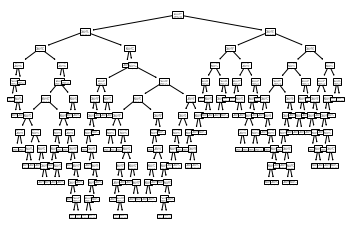

In [46]:
plot_tree(dt_clf)